# Prueba de conocimientos Python (3.3)

## César Giovanni Álvarez Silva

In [1]:
import pandas as pd

dfob = pd.read_excel('C:/Develop/Pruebas_2023/Obligaciones_clientes.xlsx','Obligaciones_clientes')
dfta = pd.read_excel('C:/Develop/Pruebas_2023/tasas_productos.xlsx','Tasas')
df31 = pd.read_excel('C:/Develop/Pruebas_2023/Punto_3_1.xlsx')

# print(df31)

### Punto 3.3.a Filtrar por el número de cedula

In [2]:
# Verificamos que la entrada sea numerica
def es_num(valor):
    try:
        int(valor)
        return True
    except ValueError:
        return False
while True:
    cedula = input("Ingresar cedula a consultar ")
    if es_num(cedula):
        break
    else:
        print("Error: se requiere un valor numerico")

cedula = int(cedula)
datacli = df31[df31['num_documento'] == cedula]

if datacli.empty:
    print("La cedula ",cedula," no se encuentra en la base de datos")
else:
    datacli = datacli[['num_documento','id_producto','fecha_desembolso','tasa_efectiva','valor_final']]
    print(datacli)

Ingresar cedula a consultar 1081648945
   num_documento                 id_producto     fecha_desembolso  \
0     1081648945  OEL - operacion_especifica  2023-01-31 00:00:00   

   tasa_efectiva    valor_final  
0       0.202839  212980.600841  


### Punto 3.3.b Mostrar el valor total - un unico registro por cliente

In [3]:
# Verificamos que la entrada sea numerica
def es_num(valor):
    try:
        int(valor)
        return True
    except ValueError:
        return False
while True:
    cedula = input("Ingresar cedula a consultar ")
    if es_num(cedula):
        break
    else:
        print("Error: se requiere un valor numerico")

cedula = int(cedula)
datacli = df31[df31['num_documento'] == cedula]

if datacli.empty:
    print("La cedula ",cedula," no se encuentra en la base de datos")
else:
    df_agrupago = datacli.groupby('num_documento', as_index=False).agg({'valor_final':'sum'})
    print(df_agrupago)

Ingresar cedula a consultar 1081648945
   num_documento    valor_final
0     1081648945  212980.600841


### Punto 3.3.c Cargar datos con Pandas --> se cargaron desde el inicio

### Punto 3.3.d Fusionar los conjuntos de datos con las columnas relevantes

In [4]:
# Se hace el merge entre los dataframe
# Solo se agrega la columna de nombre segmento, los demas datos ya estan contenidos en el dataframe importado
# asegurandonos de no generar filas duplicadas
df_result = pd.merge(df31, dfta[['cod_segmento','segmento']].drop_duplicates(), left_on='cod_segm_tasa', right_on='cod_segmento', how='left')

# Se elimina la columna duplicada
df_result.drop(columns='cod_segmento', inplace=True)

# mostramos algunas filas - Eventualmente podemos retirar algunas columnas
df_result.head(5)



radicado  num_documento  cod_segm_tasa  cod_subsegm_tasa  \
0  14427616502     1081648945              5                 2   
1  14427616257     1032058622              2                -1   
2  14427615471     1081374249              5                 2   
3  14426546522      996136114              5                 1   
4  14427616197     1080662762              5                 2   

  cal_interna_tasa                             id_producto  \
0               C4              OEL - operacion_especifica   
1               R1  0000000000097492172 - 29-Cartera Total   
2               C4                           OEL - leasing   
3               C1  0000000090000272791 - 29-Cartera Total   
4               C4  0000000090000242224 - 29-Cartera Total   

        tipo_id_producto     fecha_desembolso  valor_inicial  plazo  \
0    cod_plan - producto  2023-01-31 00:00:00   1.050000e+06   60.0   
1  Obligacion - producto  2021-09-30 00:00:00   2.848500e+05   61.0   
2    cod_plan - producto  2023-01-31 00:00:00   7.528858e+04   60.0   
3  Obligacion - producto  2021-09-30 00:00:00   6.240000e+05  121.0   
4  Obligacion - producto  2021-12-31 00:00:00   1.909350e+05   48.0   

   cod_periodicidad periodicidad   saldo_deuda modalidad tipo_plazo  \
0                 1      MENSUAL  1.050000e+06     Nuevo         LP   
1                 1      MENSUAL  2.414313e+05    Actual         LP   
2                 1      MENSUAL  7.528858e+04     Nuevo         LP   
3                 1      MENSUAL  4.375334e+05    Actual         LP   
4                 1      MENSUAL  1.159688e+05    Actual         LP   

   tasa_producto_asignado  tasa_efectiva    valor_final     segmento  
0                0.202839       0.202839  212980.600841         PYME  
1                0.121857       0.121857   34710.922253  Empresarial  
2                0.134434       0.134434   10121.360533         PYME  
3                0.193960       0.193960  121031.097057         PYME  
4                0.190215       0.190215   36318.698412         PYME

### Punto 3.3.e Limpiar valores y reprocesar datos
Creo que la data hasta acá no se ha duplicado o perdido

### Punto 3.3.f Función para calcular monto total de deuda para cada segmento de cliente

In [5]:
# En el punto 3.3.d se agrego el nombre de Segmento lo que resulta muy util

# se hace la sumatoria agrupada por segmento
suma_por_segmemto = df_result.groupby(['segmento'], as_index=False)['valor_final'].sum()

# se formatea el campo de valor para que se muestr en formato moneda
suma_por_segmemto['valor_final'] = suma_por_segmemto['valor_final'].apply(lambda x: '${:,.2f}'.format(x))

# se imprime el resultado
print(suma_por_segmemto)

                    segmento     valor_final
0                Empresarial  $31,066,530.77
1  NEGOCIOS E INDEPENDIENTES     $880,061.63
2                       PYME  $91,402,602.62


### Punto 3.3.g Analisis de agrupación basado en deuda y tasa

         radicado  num_documento  cod_segm_tasa  cod_subsegm_tasa  \
0     14427616502     1081648945              5                 2   
1     14427616257     1032058622              2                -1   
2     14427615471     1081374249              5                 2   
3     14426546522      996136114              5                 1   
4     14427616197     1080662762              5                 2   
...           ...            ...            ...               ...   
2043  14427616294      109325188              9                -1   
2044  14427615890      960246199              5                 4   
2045  14427615829     1080515925              5                 3   
2046  14427616509     1080240535              5                 2   
2047  14427615776     1080188275              5                 3   

     cal_interna_tasa                             id_producto  \
0                  C4              OEL - operacion_especifica   
1                  R1  000000000009749217

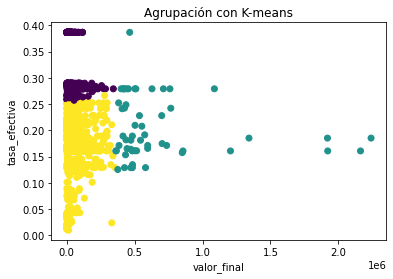

In [6]:

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Extraemos las columnas relevantes para este ejecicio:
X = df31[['valor_final','tasa_efectiva']]

# Normalizamos los datos para asegurar que esten en la misma escala:
# Tal vez no sea necesario pero lo aplico
scaler = StandardScaler()
X_scaled= scaler.fit_transform(X)

# Aplicamos el algoritmo de K-means con 3 cluster ( se puede variar el mumero de clusters)
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_scaled)

# Agregamos las etiquetas d
df31['cluster'] = kmeans.labels_

print(df31)

# Visualizar los clusters en un gráfico 
plt.scatter(df31['valor_final'], df31['tasa_efectiva'], c=df31['cluster'], cmap='viridis')
plt.xlabel('valor_final')
plt.ylabel('tasa_efectiva')
plt.title('Agrupación con K-means')
plt.show()



### Punto 3.3.h Construir un Modelo de regresion

In [7]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


df_model = df31.drop(['cal_interna_tasa','id_producto','tipo_id_producto','periodicidad','fecha_desembolso','tipo_plazo'], axis=1)

# hay que descartar unos campos vacios
df_model = df_model.dropna(subset=['plazo'])

# Convertir la columna 'modalidad' a variables numéricas usando one-hot encoding
df_model = pd.get_dummies(df_model, columns=['modalidad'])

# Definir las variables independientes (X) y la variable dependiente (y)
X = df_model.drop(columns=['valor_inicial'])
y = df_model['valor_inicial']

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE (Mean Squared Error): {mse}')
print(f'R^2 Score: {r2}')


MSE (Mean Squared Error): 177258329688.46115
R^2 Score: 0.9065116982359569


#### Punto 3.3.k Validación cruzada usando arboles de decisión
muy alto para el MSE, se supone que debe ser mas cercano a 0 


In [11]:
# Aplicando otro modelo
import statsmodels.api as sm
from sklearn.tree import DecisionTreeRegressor

df_tree = df31.drop(['cal_interna_tasa','id_producto','tipo_id_producto','periodicidad','fecha_desembolso','tipo_plazo'], axis=1)

# hay que descartar unos campos vacios
df_tree = df_model.dropna(subset=['plazo'])

# Definir las variables independientes (X) y la variable dependiente (y)
X = df_tree.drop(columns=['valor_inicial'])
y = df_tree['valor_inicial']

# Dividir el conjunto de datos en ocnjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Realizar las predicciones - conjunto de prueba
y_pred = tree_model.predict(X_test)

# Evaluar el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE (Mean Squared Error): {mse}')
print(f'R^2 Score: {r2}')

# Utilizar statsmodels para obtener intervalos de confianza (solo para modelos lineales) 
X_train_sm = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_sm)
results = model.fit()
print(results.summary())


MSE (Mean Squared Error): 672437801760.0286
R^2 Score: 0.6453477349189777
                            OLS Regression Results                            
Dep. Variable:          valor_inicial   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     2971.
Date:                Tue, 01 Aug 2023   Prob (F-statistic):               0.00
Time:                        01:58:06   Log-Likelihood:                -21545.
No. Observations:                1633   AIC:                         4.312e+04
Df Residuals:                    1620   BIC:                         4.319e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------

C:\Users\cesaralv\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


## Punto 3.4 - Python parte 2

### 3.4.a promedio de una secuencia

In [14]:
# Priemero leer la secuencia
numeros = []

while True:
    try:
        num = float(input("Digite un numero (-1 para terminar): "))
        if num == -1:
            break
        numeros.append(num)
    except ValueError:
        print("Entrada invalida")

# calcular el primer promedio
if not numeros:
    print("la secuencia esta vacia - Imposible calcular")
else:
    avg = sum(numeros)/len(numeros)
    print(f"El promedio de la secuencia completa es: {avg}")

    # Calculo de promedio de valores mayores al promedio
    mayores = [num for num in numeros if num > avg]
    if not mayores:
        print("No hay datos mayores")
    else:
        avg_mayores = sum(mayores)/len(mayores)
        print(f"El promedio de la valores mayores al promedio general es: {avg_mayores}")

Digite un numero (-1 para terminar): 56
Digite un numero (-1 para terminar): 98
Digite un numero (-1 para terminar): 45
Digite un numero (-1 para terminar): 15
Digite un numero (-1 para terminar): 984
Digite un numero (-1 para terminar): 548
Digite un numero (-1 para terminar): 128
Digite un numero (-1 para terminar): -1
El promedio de la secuencia completa es: 267.7142857142857
El promedio de la valores mayores al promedio general es: 766.0


### Punto 3.4.b Vector y valor x

In [ ]:

# usaremos dos punteros left y right para recorrer el vecrtor ordenado
# se va calculado el el valor de la suma que se acerque a x
def find_closest_sum_pair(arr, x): 
    left, right = 0, len(arr) - 1
    closest_sum = float('inf')
    closest_pair = (None, None)

    while left < right:
        current_sum = arr[left] + arr[right]
        diff = abs(current_sum - x)

        if diff < closest_sum:
            closest_sum = diff
            closest_pair = (arr[left], arr[right])

        if current_sum < x:
            left += 1
        else:
            right -= 1

    return closest_pair

# Ejemplo de uso:
# Supongamos que contamos con un vector ordenado llamado 'sorted_vector' y un número 'x'
sorted_vector = [1, 3, 5, 7, 9]
x = 8

closest_pair = find_closest_sum_pair(sorted_vector, x)
print(f"El par de números cuya suma se acerca más a {x} es: {closest_pair}")


### Punto 3.4.c Rotaciones de matriz

In [ ]:
def rotar_matrix(matrix, p): 
    m, n = len(matrix), len(matrix[0])
    p = p % 4 # Normalizar el número de rotaciones a 0, 1, 2 o 3

    if p < 0:
        p = 4 + p

    if p == 0:
        print_matrix(matrix)
    elif p == 1:
        rotated_matrix = [list(row[::-1]) for row in zip(*matrix)]
        print_matrix(rotated_matrix)
    elif p == 2:
        rotated_matrix = [row[::-1] for row in matrix[::-1]]
        print_matrix(rotated_matrix)
    elif p == 3:
        rotated_matrix = [list(row) for row in zip(*matrix[::-1])]
        print_matrix(rotated_matrix)

def print_matrix(matrix):
    for row in matrix:
        print(' '.join(map(str, row)))

# Ejemplo de uso:
# Supongamos que tienes una matriz mxn llamada 'matrix' y un número 'p'
matrix = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
p = -1

rotar_matrix(matrix, p)
